In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sys
sys.path.append("../../scripts/")
sys.path.append("../../config/")
from utils.load_save import *
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#import metadata 
df = load_data('preprocessed','model_data', sorghum = True)

In [3]:
df.head()

X350      X351      X352      X353      X354      X355      X356  \
0  0.085242  0.084198  0.073049  0.062852  0.071412  0.076959  0.086402   
1  0.053529  0.087761  0.089831  0.066536  0.070464  0.065440  0.057905   
2  0.133649  0.113164  0.095398  0.095292  0.097985  0.089531  0.085457   
3  0.097961  0.120834  0.117528  0.105637  0.117464  0.114949  0.094325   
4  0.119853  0.089598  0.093482  0.111414  0.079122  0.059123  0.080614   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.089655  0.068680  0.077627  0.075629  0.049378  0.047664  0.048732   
1  0.061879  0.087529  0.083688  0.066741  0.054267  0.042131  0.050978   
2  0.086694  0.082119  0.090674  0.082183  0.057630  0.074017  0.063699   
3  0.065832  0.048789  0.073219  0.081584  0.056714  0.060614  0.070839   
4  0.111972  0.087410  0.104930  0.096836  0.053224  0.080590  0.084966   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.053430  0.059725  0.043177  0.055788  0.069612  0.049814  0.054452   
1  0.056994  0.045107  0.046368  0.043490  0.042569  0.050927  0.046258   
2  0.056483  0.072555  0.051468  0.052361  0.063759  0.055830  0.039474   
3  0.069224  0.052546  0.054142  0.050753  0.047373  0.053790  0.054773   
4  0.075567  0.074128  0.078823  0.067031  0.053021  0.057072  0.060873   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.055179  0.045720  0.038621  0.047542  0.053812  0.049443  0.042255   
1  0.041853  0.043365  0.048262  0.047062  0.048264  0.051650  0.044692   
2  0.044329  0.059886  0.055076  0.055611  0.054215  0.045810  0.032091   
3  0.054419  0.053784  0.051654  0.051760  0.047968  0.041533  0.044133   
4  0.065333  0.067081  0.061981  0.071762  0.075621  0.067405  0.063775   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.043361  0.048633  0.051029  0.044424  0.043408  0.041854  0.032599   
1  0.043194  0.040966  0.035022  0.041995  0.044352  0.042166  0.041462   
2  0.028689  0.033169  0.038722  0.042077  0.040161  0.037917  0.041208   
3  0.045536  0.044833  0.043555  0.044323  0.046548  0.047120  0.043801   
4  0.060381  0.061531  0.067389  0.065502  0.061511  0.059425  0.060912   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.041451  0.048299  0.048850  0.050056  0.046709  0.043648  0.042465   
1  0.043841  0.043980  0.042063  0.041588  0.038251  0.035009  0.034469   
2  0.046213  0.048145  0.046461  0.043884  0.043052  0.039607  0.035373   
3  0.041798  0.044390  0.047735  0.044487  0.041309  0.041181  0.042178   
4  0.060602  0.060764  0.061790  0.062637  0.064547  0.063739  0.060583   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.038687  0.046113  0.051060  0.044858  0.047175  0.049994  0.049110   
1  0.037531  0.040736  0.042420  0.042195  0.041240  0.040235  0.039823   
2  0.041091  0.045182  0.045669  0.043754  0.042794  0.041254  0.040067   
3  0.036865  0.041394  0.046532  0.043942  0.042325  0.037681  0.036676   
4  0.061476  0.058410  0.057525  0.062045  0.058640  0.057564  0.058823   

       X399      X400      X401      X402      X403      X404      X405  \
0  0.043823  0.043862  0.041952  0.039572  0.044624  0.044988  0.046128   
1  0.040379  0.041654  0.042781  0.042810  0.041331  0.044993  0.048847   
2  0.040752  0.043151  0.043261  0.042180  0.044544  0.044126  0.043205   
3  0.045545  0.047267  0.044312  0.042000  0.045793  0.044095  0.041549   
4  0.058657  0.056359  0.056490  0.059140  0.060611  0.057030  0.055395   

       X406      X407      X408      X409      X410      X411      X412  \
0  0.048967  0.043201  0.043568  0.048380  0.051787  0.049475  0.048316   
1  0.048443  0.042648  0.044995  0.048170  0.044979  0.047369  0.049684   
2  0.043584  0.044392  0.045137  0.045063  0.044390  0.046864  0.045013   
3  0.042731  0.048602  0.051622  0.049463  0.044416  0.048134  0.053422   
4  0.058313  0.059271  0

In [26]:
df.shape

(521, 2153)

In [4]:
df.fillna(method = 'bfill',inplace =True)

In [5]:
#perform data_splitting into train and test

In [6]:
X = df[df.columns[:-2]]
y = df[['Trt','DaysToBloom']]
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101 )

In [7]:
#run PCA

In [8]:
#fit on the training data

pca = PCA(.99)
pca.fit(x_train)

PCA(n_components=0.99)

In [9]:
pca.explained_variance_ratio_

array([0.7496176 , 0.18045677, 0.04858192, 0.00723592, 0.0026846 ,
       0.00246907])

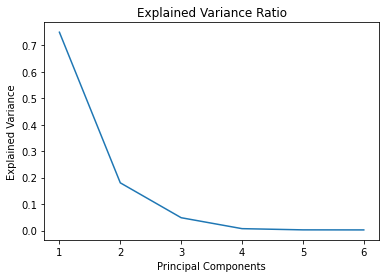

In [18]:
# Plot
plt.plot(range(1,7), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

In [10]:
principal_components = pca.transform(x_train)

In [12]:
principalDF = pd.DataFrame(data = principal_components, columns = ['PC'+str(i) for i in range(1,7)])
principalDF.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.671037,0.803074,-0.212744,-0.166700,0.015235,0.013501
1,0.832128,-0.327718,-0.336188,-0.052903,0.022296,-0.057711
2,1.933984,0.467232,-0.186656,0.026562,-0.034048,-0.006808
3,-0.686219,-0.562769,-0.302601,-0.016734,-0.004581,0.024336
4,-1.182181,0.098152,-0.323197,-0.068867,0.016627,0.005116


In [22]:
finalDf = principalDF[['PC1','PC2']]
finalDf['Trt'] = list(y_train.Trt)
finalDf.head()

/var/folders/pv/ngp792z534x3m9htqz22z3p4vfnyrx/T/ipykernel_23845/2755715868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Trt'] = list(y_train.Trt)


,PC1,PC2,Trt
0,0.671037,0.803074,LN
1,0.832128,-0.327718,LN
2,1.933984,0.467232,HN
3,-0.686219,-0.562769,HN
4,-1.182181,0.098152,HN


In [24]:
#pca visuals
principalDF.shape

(364, 6)

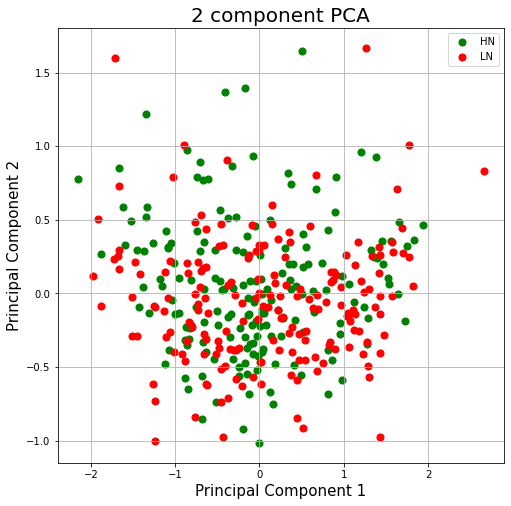

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['HN', 'LN']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Trt'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
finalDf.loc[indicesToKeep, 'PC1']

In [ ]:
#transform training data

In [31]:
df_train = principalDF.copy()
df_train['Treatment'] = list(y_train.Trt)
df_train['DaysToBloom'] = list(y_train.DaysToBloom)

In [ ]:
#transform test_data

In [32]:
transformed_test = pca.transform(x_test)

In [34]:
pdf_test = pd.DataFrame(data = transformed_test, columns = ['PC'+str(i) for i in range(1,7)])

In [35]:
pdf_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.076035,-0.217028,-0.357226,-0.046694,0.017609,-0.016138
1,1.488888,0.585662,0.161414,-0.017099,0.052502,-0.019014
2,0.607286,-0.319981,0.000537,-0.147700,-0.009796,-0.051512
3,-0.137712,0.815330,-0.290605,0.145794,0.023803,0.096924
4,-1.747946,0.621834,-0.051187,0.227503,-0.128675,-0.025070


In [36]:
df_test = pdf_test.copy()
df_test['Treatment'] = list(y_test.Trt)
df_test['DaysToBloom'] = list(y_test.DaysToBloom)

In [38]:
#save train and test data
save_data('train_test','train',df_train,sorghum = True)
save_data('train_test','test',df_test,sorghum = True)